<a href="https://colab.research.google.com/github/dikoharyadhanto/Machine-Learning-Documentation/blob/main/004-Supervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Supervised Learning Algoritm**

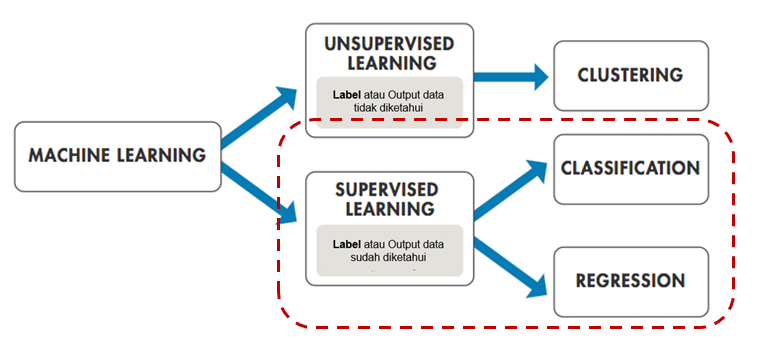

## **Classification — Logistic Regression**

Logistic regression hampir serupa dengan linear regression. Perbedaannya, linear regression digunakan untuk Label atau Target Variable yang berupa numerik atau continuous value, sedangkan Logistic regression digunakan untuk Label atau Target yang berupa categorical/discrete value.

Contoh continuous value adalah harga rumah, harga saham, suhu, dsb; dan contoh dari categorical value adalah prediksi SPAM or NOT SPAM (1 dan 0) atau prediksi customer SUBSCRIBE atau UNSUBSCRIBED (1 dan 0).

Umumnya Logistic Regression dipakai untuk binary classification (1/0; Yes/No; True/False) problem, tetapi beberapa data scientist juga menggunakannya untuk multiclass classification problem.

Logistic regression adalah salah satu linear classifier, oleh karena itu, Logistik regression juga menggunakan rumus atau fungsi yang sama seperti linear regression yaitu:

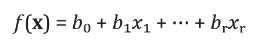

yang disebut Logit, dimana Variabel 𝑏₀, 𝑏₁, …, 𝑏ᵣ adalah koefisien regresi, dan 𝑥₁, …, 𝑥ᵣ adalah explanatory variable/variabel input atau feature.

Output dari Logistic Regression adalah 1 atau 0; sehingga real value dari fungsi logit ini perlu ditransfer ke nilai di antara 1 dan 0 dengan menggunakan fungsi sigmoid.

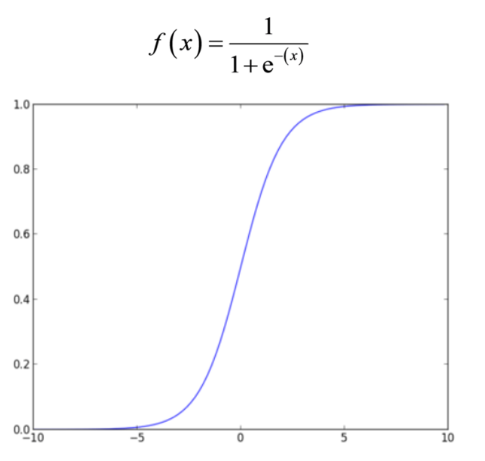

Jadi, jika output dari fungsi sigmoid bernilai lebih dari 0.5, maka data point diklasifikasi ke dalam label/class: 1 atau YES; dan kurang dari 0.5, akan diklasifikasikan ke dalam label/class: 0 atau NO.

**CATATAN**: Logistic Regression hanya dapat mengolah data dengan tipe numerik. Pada saat preparasi data, pastikan untuk mengecek tipe variabel yang ada dalam dataset dan pastikan semuanya adalah numerik, lakukan data transformasi jika diperlukan.

# **Persiapan Dataset**

In [9]:
## EXPLORING DATA

import pandas as pd
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/pythonTutorial/online_raw.csv')
dataset.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [10]:
#Drop rows with missing value   
dataset_clean = dataset.dropna() 
print('Ukuran dataset_clean:', dataset_clean.shape) 

Ukuran dataset_clean: (12316, 18)


In [11]:
# Fill missing value with mean of feature value  
dataset.fillna(dataset.mean(), inplace = True)
# Checking missing value for each feature  
print(dataset.isnull().sum())
# Counting total missing value  
print(dataset.isnull().sum().sum())

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64
0


In [12]:
from sklearn.preprocessing import MinMaxScaler  
#Define MinMaxScaler as scaler  
scaler = MinMaxScaler()  
#list all the feature that need to be scaled  
scaling_column = [
                  'Administrative','Administrative_Duration','Informational',
                  'Informational_Duration','ProductRelated','ProductRelated_Duration',
                  'BounceRates','ExitRates','PageValues'
                 ]
#Apply fit_transfrom to scale selected feature  
dataset[scaling_column] = scaler.fit_transform(dataset[scaling_column])

In [13]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
# Convert feature/column 'Month'
LE = LabelEncoder()
dataset['Month'] = LE.fit_transform(dataset['Month'])
print(LE.classes_)
print(np.sort(dataset['Month'].unique()))
print('')

# Convert feature/column 'VisitorType'
LE = LabelEncoder()
dataset['VisitorType'] = LE.fit_transform(dataset['VisitorType'])
print(LE.classes_)
print(np.sort(dataset['VisitorType'].unique()))

['Aug' 'Dec' 'Feb' 'Jul' 'June' 'Mar' 'May' 'Nov' 'Oct' 'Sep']
[0 1 2 3 4 5 6 7 8 9]

['New_Visitor' 'Other' 'Returning_Visitor']
[0 1 2]


In [14]:
# removing the target column Revenue from dataset and assigning to X
X = dataset.drop(['Revenue'], axis = 1)
# assigning the target column Revenue to y
y = dataset['Revenue']
# checking the shapes
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (12330, 17)
Shape of y: (12330,)


In [15]:
from sklearn.model_selection import train_test_split
# splitting the X, and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
# checking the shapes
print("Shape of X_train :", X_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of X_test :", X_test.shape)
print("Shape of y_test :", y_test.shape)

Shape of X_train : (9864, 17)
Shape of y_train : (9864,)
Shape of X_test : (2466, 17)
Shape of y_test : (2466,)


# **Pemodelan Permasalahan Klasifikasi dengan Logistic Regression**

Dengan menggunakan dataset yang sama yaitu online_raw, dan setelah dataset dibagi ke dalam Training Set dan Test Set, cukup menggunakan modul linear_model dari Scikit-learn, dan memanggil fungsi `LogisticRegression()` yang diberi nama `logreg`.

Kemudian, model yang sudah ditraining ini bisa digunakan untuk memprediksi output/label dari test dataset sekaligus mengevaluasi model performance dengan fungsi `score()`, `confusion_matrix()` dan `classification_report()`.

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Call the classifier
logreg = LogisticRegression()
# Fit the classifier to the training data  
logreg = logreg.fit(X_train, y_train)
#Training Model: Predict 
y_pred = logreg.predict(X_test)

#Evaluate Model Performance
print('Training Accuracy :', logreg.score(X_train, y_train))  
print('Testing Accuracy :', logreg.score(X_test, y_test))  

# confusion matrix
print('\nConfusion matrix')  
cm = confusion_matrix(y_test, y_pred)  
print(cm)

# classification report  
print('\nClassification report')  
cr = classification_report(y_test, y_pred)  
print(cr)

Training Accuracy : 0.8806772100567721
Testing Accuracy : 0.8584752635847527

Confusion matrix
[[2011   33]
 [ 316  106]]

Classification report
              precision    recall  f1-score   support

       False       0.86      0.98      0.92      2044
        True       0.76      0.25      0.38       422

    accuracy                           0.86      2466
   macro avg       0.81      0.62      0.65      2466
weighted avg       0.85      0.86      0.83      2466



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# **Membuat Model Machine Learning dengan Menggunakan Decision Tree**

Decision tree adalah model prediksi dengan struktur pohon atau struktur berhierarki. Decision Tree dapat digunakan untuk classification problem dan regression problem. Secara sederhana, struktur dari decision tree adalah sebagai berikut:

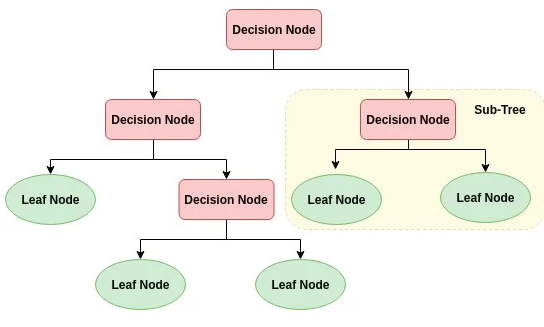

Decision tree terdiri dari :
1. Decision Node yang merupakan feature/input variabel;
2. ranch yang ditunjukkan oleh garis hitam berpanah, yang adalah rule/aturan keputusan, dan
3. Leaf yang merupakan output/hasil.

Decision Node paling atas dalam decision tree dikenal sebagai akar keputusan, atau feature utama yang menjadi asal mula percabangan. Jadi, decision tree membagi data ke dalam kelompok atau kelas berdasarkan feature/variable input, yang dimulai dari node paling atas (akar), dan terus bercabang ke bawah sampai dicapai cabang akhir atau leaf.

Misalnya ingin memprediksi apakah seseorang yang mengajukan aplikasi kredit/pinjaman, layak untuk mendapat pinjaman tersebut atau tidak. Dengan menggunakan decision tree, dapat membreak-down kriteria-kriteria pengajuan pinjaman ke dalam hierarki seperti gambar berikut :

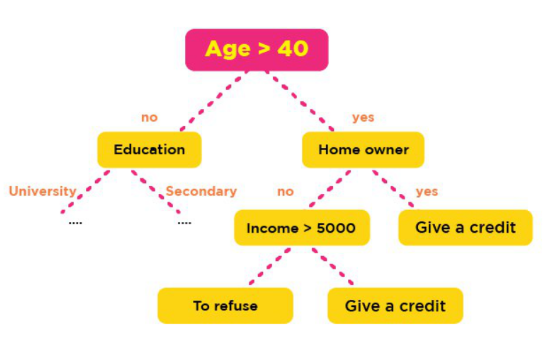

Seumpama, orang yang mengajukan berumur lebih dari 40 tahun, dan memiliki rumah, maka aplikasi kreditnya dapat diluluskan, sedangkan jika tidak, maka perlu dicek penghasilan orang tersebut. Jika kurang dari 5000, maka permohonan kreditnya akan ditolak. Dan jika usia kurang dari 40 tahun, maka selanjutnya dicek jenjang pendidikannya, apakah universitas atau secondary. Nah, percabangan ini masih bisa berlanjut hingga dicapai percabangan akhir/leaf node.

## **Tugas Praktek: Membuat Model Machine Learning dengan Menggunakan Decision Tree**

Dengan menggunakan dataset **`online_raw.csv`** dan diasumsikan sudah melakukan EDA dan pre-processing, kita akan membuat model machine learning dengan menggunakan **decision tree**:
1. Import **`DecisionTreeClassifier`** dan panggil fungsi tersebut dengan nama **`decision_tree`**
2. **Split** dataset ke dalam **training & testing** dataset dengan perbandingan **70:30**, dengan **`random_state = 0`**
3. Latih model dengan **training feature** (**`X_train`**) dan training target (**`y_train`**) menggunakan **`.fit()`**
4. Evaluasi hasil model decision_tree yang sudah dilatih dengan **testing feature** (**`X_test`**) dan print nilai akurasi dari training dan testing dengan fungsi **`.score()`**

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Call the classifier
decision_tree = DecisionTreeClassifier()
# Fit the classifier to the training data
decision_tree = decision_tree.fit(X_train, y_train)

# evaluating the decision_tree performance
print('Training Accuracy :', decision_tree.score(X_train, y_train))
print('Testing Accuracy :', decision_tree.score(X_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.8615842119491754


# **Regression: Linear Regression**

Regresi digunakan untuk memprediksi output label yang berbentuk numerik atau continuous value. Dalam proses training, model regresi akan menggunakan variabel input (features) dan variabel output (label) untuk mempelajari bagaimana hubungan/pola dari variabel input dan output.

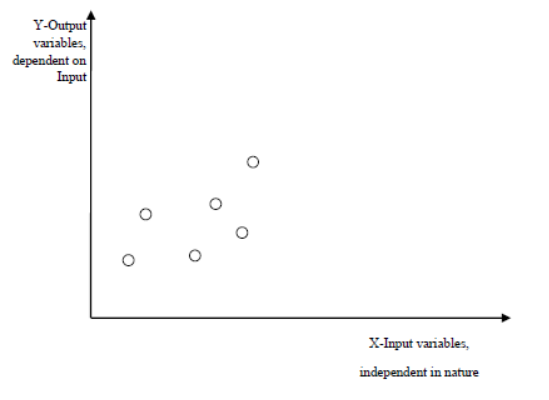

Model regresi terdiri atas 2 tipe yaitu :
1. Simple regression model → model regresi paling sederhana, hanya terdiri dari satu feature (univariate) dan 1 target.
2. Multiple regression model → sesuai namanya, terdiri dari lebih dari satu feature (multivariate).

Adapun model regresi yang paling umum digunakan adalah Linear Regression.

Linear regression digunakan untuk menganalisis hubungan linear antara dependent variabel (feature) dan independent variabel (label). Hubungan linear disini berarti bahwa jika nilai dari independen variabel mengalami perubahan baik itu naik atau turun, maka nilai dari dependen variabel juga mengalami perubahan (naik atau turun). Rumus matematis dari Linear Regression adalah:

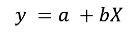

untuk simple linear regression, atau

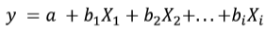

untuk multiple linear regression dengan, y adalah target/label, X adalah feature, dan a,b adalah model parameter (intercept dan slope).

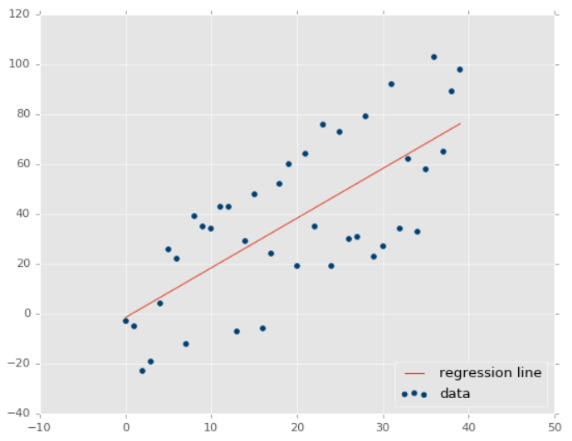

Perlu diketahui bahwa tidak semua problem dapat diselesaikan dengan linear regression. Untuk pemodelan dengan linear regression, terdapat beberapa asumsi yang harus dipenuhi, yaitu :
1. Terdapat hubungan linear antara variabel input (feature) dan variabel output(label). Untuk melihat hubungan linear feature dan label, dapat menggunakan chart seperti scatter chart. Untuk mengetahui hubungan dari variabel umumnya dilakukan pada tahap eksplorasi data.
2. Tidak ada multicollinearity antara features. Multicollinearity artinya terdapat dependency antara feature, misalnya saja hanya bisa mengetahui nilai feature B jika nilai feature A sudah diketahui.
3. Tidak ada autocorrelation dalam data, contohnya pada time-series data.

## **Tugas Praktek: Regresi Linear**

In [18]:
#load dataset
import pandas as pd
housing = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/pythonTutorial/housing_boston.csv')
#Data rescaling
from sklearn import preprocessing
data_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
housing[['RM','LSTAT','PTRATIO','MEDV']] = data_scaler.fit_transform(housing[['RM','LSTAT','PTRATIO','MEDV']])
# getting dependent and independent variables
X = housing.drop(['MEDV'], axis = 1)
y = housing['MEDV']
# checking the shapes
print('Shape of X:', X.shape)
print('Shape of y:', y.shape)

# splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# checking the shapes  
print('Shape of X_train :', X_train.shape)
print('Shape of y_train :', y_train.shape)
print('Shape of X_test :', X_test.shape)
print('Shape of y_test :', y_test.shape)

##import regressor from Scikit-Learn
from sklearn.linear_model import LinearRegression
# Call the regressor
reg = LinearRegression()
# Fit the regressor to the training data  
reg = reg.fit(X_train, y_train)
# Apply the regressor/model to the test data  
y_pred = reg.predict(X_test)

Shape of X: (489, 3)
Shape of y: (489,)
Shape of X_train : (342, 3)
Shape of y_train : (342,)
Shape of X_test : (147, 3)
Shape of y_test : (147,)


## **Tugas Praktek: Regression Performance Evaluation**

Untuk model regression, kita menghitung selisih antara nilai aktual (`y_test`) dan nilai prediksi (`y_pred`) yang disebut error, adapun beberapa metric yang umum digunakan.

- **Mean Squared Error (MSE)** adalah rata-rata dari squared error:

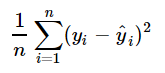

- **Root Mean Squared Error (RMSE)** adalah akar kuadrat dari MSE:

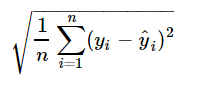

- **Mean Absolute Error (MAE)** adalah rata-rata dari nilai absolut error:

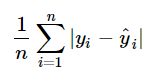

Semakin kecil nilai MSE, RMSE, dan MAE, semakin baik pula performansi model regresi.

Untuk menghitung nilai MSE, RMSE dan MAE dapat dilakukan dengan menggunakan fungsi m`ean_squared_error ()` , `mean_absolute_error ()` dari scikit-learn.metrics. Sedangkan untuk RMSE sendiri, tidak terdapat fungsi khusus di scikit-learn tapi dapat dengan mudah kita hitung dengan terlebih dahulu menghitung MSE kemudian menggunakan numpy module yaitu, `sqrt()` untuk memperoleh nilai akar kuadrat dari MSE.

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error  
import numpy as np
import matplotlib.pyplot as plt 

#Calculating MSE, lower the value better it is. 0 means perfect prediction
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error of testing set:', mse)
#Calculating MAE
mae = mean_absolute_error(y_test, y_pred)
print('Mean absolute error of testing set:', mae)
#Calculating RMSE
rmse = np.sqrt(mse)
print('Root Mean Squared Error of testing set:', rmse)

Mean squared error of testing set: 0.010913024655841009
Mean absolute error of testing set: 0.07789896103120689
Root Mean Squared Error of testing set: 0.1044654232549747


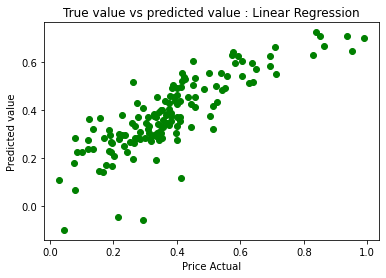

In [20]:
#Plotting y_test dan y_pred
plt.scatter(y_test, y_pred, c = 'green')
plt.xlabel('Price Actual')
plt.ylabel('Predicted value')
plt.title('True value vs predicted value : Linear Regression')
plt.show()